##### What I want to achieve in this notebook?

Tests about dropout, regularization L1 and L2, dropout and regularization at the same time, and for different "strengths". 

In [1]:
import sys

sys.path.append("../src")

import torch
from torch import nn

import torchvision
import torchvision.transforms as transforms


from baseline_model import BaselineModel
from enhanced_model import EnhancedModel
from helper_functions import run_model
from plots_functions import (
    multiple_runs_with_uncertainty_band,
    multiple_runs_with_every_run,
)


device = "cuda" if torch.cuda.is_available() else "cpu"


data_loader_args = {
    "batch_size": 64,
    "shuffle": True,
    "num_workers": 6,
    "pin_memory": True,
    "persistent_workers": True,
}


seed = 213
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

### Test run of refactored code 

In [16]:
epochs = 15
lr = 0.01
num_of_repeats = 4
metrics_list = []
total_time_list = []

cinic_directory = "../data"
cinic_train = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        cinic_directory + "/train", transform=transforms.ToTensor()
    ),
    **data_loader_args
)

cinic_test = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        cinic_directory + "/test", transform=transforms.ToTensor()
    ),
    **data_loader_args
)


for i in range(num_of_repeats):
    model = BaselineModel(input_shape=3, hidden_units=15, output_shape=10).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params=model.parameters(), lr=lr, momentum=0.9)

    metrics, total_time = run_model(
        cinic_train, cinic_test, model, loss_fn, optimizer, device=device, epochs=epochs
    )

    metrics_list.append(metrics)
    total_time_list.append(total_time)

  0%|          | 0/15 [00:00<?, ?it/s]


Train time on cuda: 63.328 seconds


  0%|          | 0/15 [00:00<?, ?it/s]


Train time on cuda: 65.030 seconds


  0%|          | 0/15 [00:00<?, ?it/s]


Train time on cuda: 62.912 seconds


  0%|          | 0/15 [00:00<?, ?it/s]


Train time on cuda: 63.276 seconds


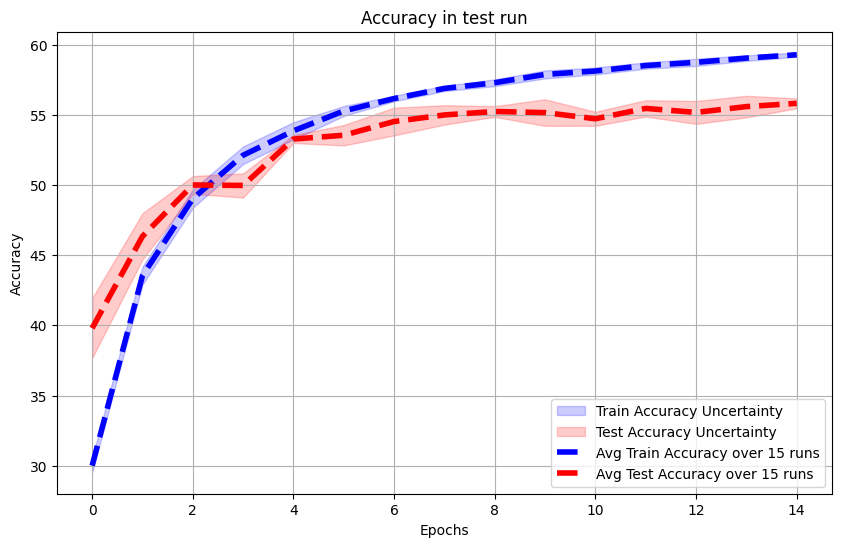

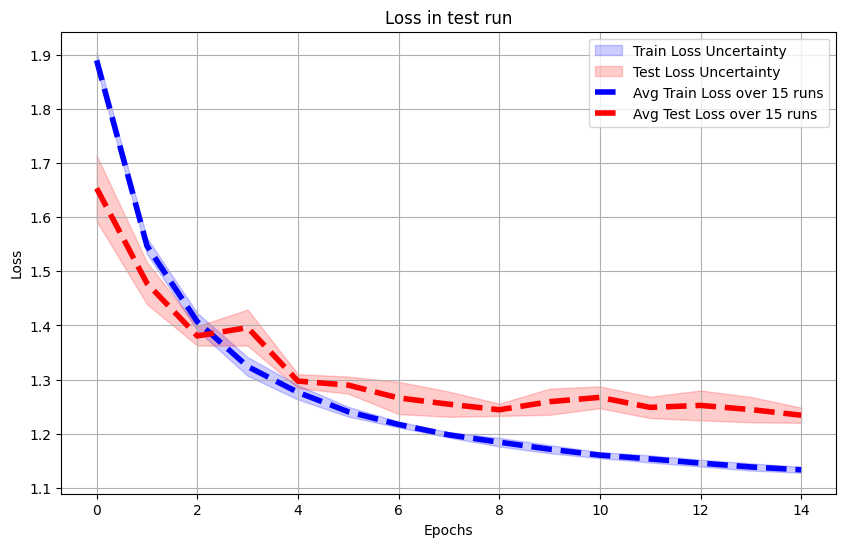

In [17]:
multiple_runs_with_uncertainty_band(
    metrics_list=metrics_list,
    title_accuracy="Accuracy in test run",
    title_loss="Loss in test run",
)

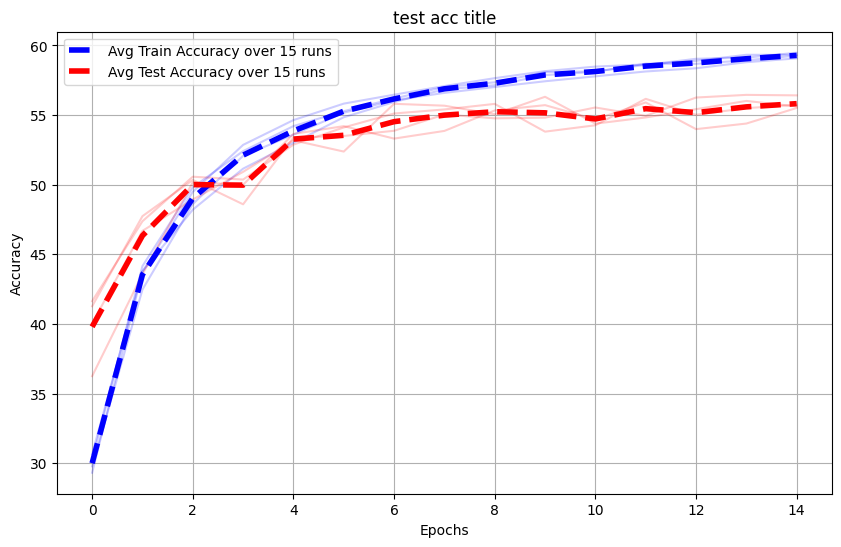

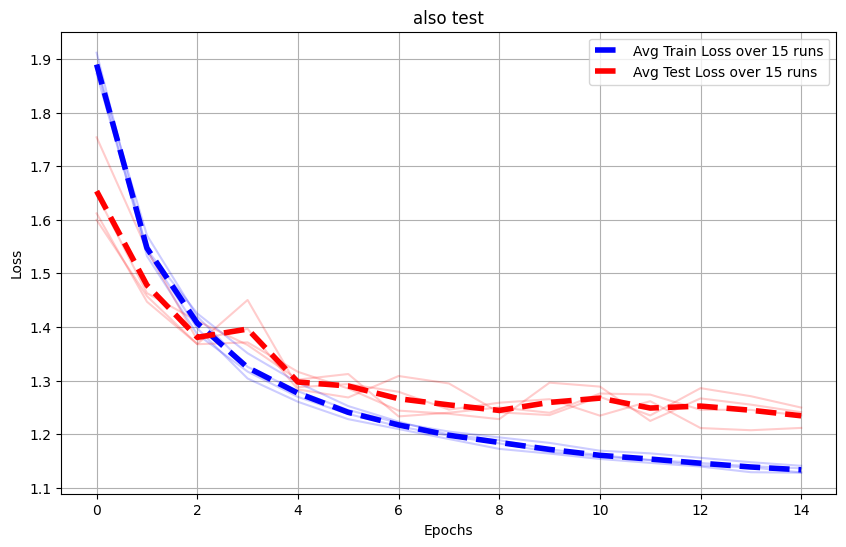

In [18]:
multiple_runs_with_every_run(
    metrics_list=metrics_list, title_accuracy="test acc title", title_loss="also test"
)

In [2]:
epochs = 1
lr = 0.01
num_of_repeats = 1
dropouts = [0, 0.25, 0.5, 0.75]
regularizations = [0, 0.0001, 0.001, 0.01, 0.05]

cinic_directory = "../data"
cinic_train = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        cinic_directory + "/train", transform=transforms.ToTensor()
    ),
    **data_loader_args
)

cinic_test = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        cinic_directory + "/test", transform=transforms.ToTensor()
    ),
    **data_loader_args
)

for dropout in dropouts:
    for regularization in regularizations:
        metrics_list = []
        total_time_list = []
        for i in range(num_of_repeats):
            model = BaselineModel(
                input_shape=3, hidden_units=15, output_shape=10, dropout_p=dropout
            ).to(device)

            loss_fn = nn.CrossEntropyLoss()
            optimizer = torch.optim.SGD(
                params=model.parameters(),
                lr=lr,
                momentum=0.9,
                weight_decay=regularization,
            )

            metrics, total_time = run_model(
                cinic_train,
                cinic_test,
                model,
                loss_fn,
                optimizer,
                device=device,
                epochs=epochs,
            )

            metrics_list.append(metrics)
            total_time_list.append(total_time)

  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.696 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.222 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.157 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.161 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.161 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.207 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.169 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.187 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.162 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.127 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.160 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.156 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.210 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.234 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.171 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.166 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.195 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.165 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.162 seconds


  0%|          | 0/1 [00:00<?, ?it/s]


Train time on cuda: 4.156 seconds
